Загрузка данных и вывод первых 5 строк

In [2]:
import pandas as pd 
import numpy as np
df = pd.read_csv('pretty_car_price_dataset.csv') 
print(df.head(5))

        Бренд  Модель   Год  Объём двигателя Тип топлива     Трансмиссия  \
0         Kia     Rio  2020              4.2      Diesel          Manual   
1   Chevrolet  Malibu  2012              2.0      Hybrid       Automatic   
2    Mercedes     GLA  2020              4.2      Diesel       Automatic   
3        Audi      Q5  2023              2.0    Electric          Manual   
4  Volkswagen    Golf  2003              2.6      Hybrid  Semi-Automatic   

   Пробег  Количество дверей  Количество владельцев  Стоимость  
0  289944                  3                      5       8501  
1    5356                  2                      3      12092  
2  231440                  4                      2      11171  
3  160971                  2                      1      11780  
4  286618                  3                      3       2867  


Предобработка данных

In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, normalize

le = LabelEncoder()
df['Тип топлива'] = le.fit_transform(df['Тип топлива'])
df['Трансмиссия'] = le.fit_transform(df['Трансмиссия'])

numeric_cols = ['Год', 'Объём двигателя', 'Тип топлива', 'Трансмиссия',
                'Пробег', 'Количество дверей', 'Количество владельцев', 'Стоимость']
X = df[numeric_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_normal = normalize(X_scaled)
X_normal = pd.DataFrame(X_normal)

Уменьшение размерности

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normal)
X_principal = pd.DataFrame(X_pca, columns=['V1', 'V2'])
print(X_principal.head())

         V1        V2
0  0.091097  0.232260
1  0.486779 -0.421122
2  0.487612  0.103940
3  0.397847  0.323741
4 -0.948015  0.286639


Кластеризация DBSCAN

In [5]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.105, min_samples=2).fit(X_principal)
labels = dbscan.labels_
X_principal['cluster_dbscan'] = labels

print("Метки кластеров:", set(labels))
print("Количество кластеров:", len(set(labels)) - (1 if -1 in labels else 0))
print("Процент шума:", (list(labels).count(-1) / len(labels)) * 100)

Метки кластеров: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1}
Количество кластеров: 11
Процент шума: 1.002004008016032


Кластеризация OPTICS

In [6]:
from sklearn.cluster import OPTICS

optics = OPTICS(min_samples=2).fit(X_principal)
labels_optics = optics.labels_
X_principal['cluster_optics'] = labels_optics

print("Метки кластеров (OPTICS):", set(labels_optics))
print("Количество кластеров (OPTICS):", len(set(labels_optics)) - (1 if -1 in labels_optics else 0))
print("Процент шума (OPTICS):", (list(labels_optics).count(-1) / len(labels_optics)) * 100)

Метки кластеров (OPTICS): {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, -1}
Количество кластеров (OPTICS): 154
Процент шума (OPTICS): 13.026052104208416


Визуализация результатов

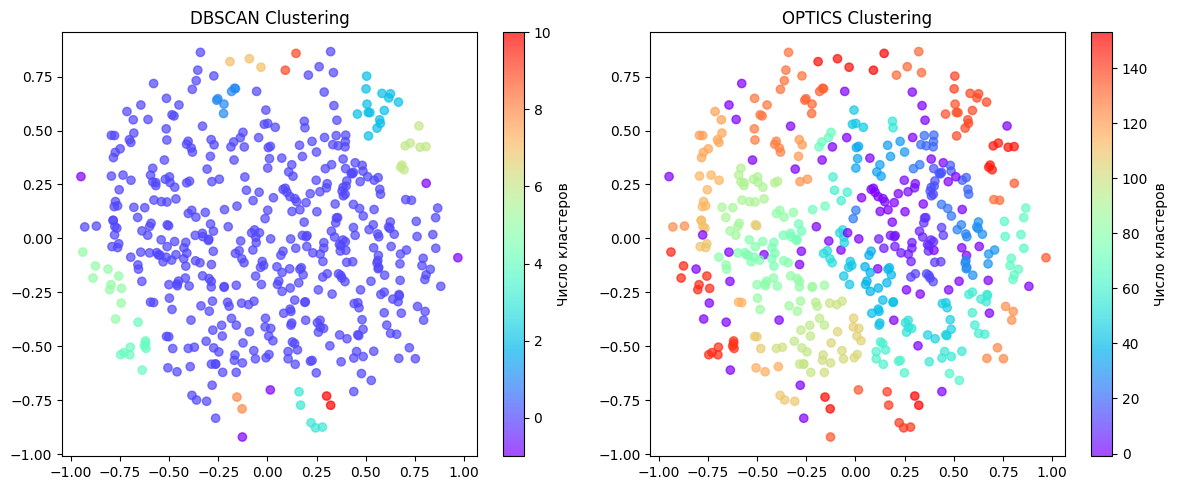

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_principal['V1'], X_principal['V2'], c=X_principal['cluster_dbscan'], alpha=0.7, cmap="rainbow")
plt.title('DBSCAN Clustering')
plt.colorbar(label="Число кластеров")

plt.subplot(1, 2, 2)
plt.scatter(X_principal['V1'], X_principal['V2'], c=X_principal['cluster_optics'], alpha=0.7, cmap="rainbow")
plt.title('OPTICS Clustering')
plt.colorbar(label="Число кластеров")

plt.tight_layout()
plt.show()

Примеры метрик
Для оценки качества кластеризации используют различные метрики, которые позволяют количественно измерить степень компактности и разделимости полученных кластеров:  

Коэффициент силуэта. Измеряет, насколько хорошо объект соответствует своему кластеру по сравнению с другими кластерами. Принимает значения от -1 до 1, где 1 означает, что объект идеально классифицирован, 0 — объект лежит на границе кластеров, а -1 — объект классифицирован неверно.  

Индекс Дэвиса-Булдина. Средний показатель сходства каждого кластера с наиболее похожим кластером, где сходство — отношение расстояний внутри кластера к расстояниям между кластерами. Более низкие значения указывают на лучшую кластеризацию.  

Нормализованная взаимная информация. Показывает, назначаются ли одинаковые точки данных одному и тому же кластеру, а разные точки данных — различным кластерам. Принимает значения от 0 до 1, где ближе к 1 лучше.  

In [9]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, normalized_mutual_info_score

silhouette_db = silhouette_score(X_principal[['V1', 'V2']], labels)
davies_bouldin_db = davies_bouldin_score(X_principal[['V1', 'V2']], labels)
print("DBSCAN:")
print(f"Коэффициент силуэта: {silhouette_db}")
print(f"Индекс Дэвиса-Болдина: {davies_bouldin_db}")


silhouette_opt = silhouette_score(X_principal[['V1', 'V2']], labels_optics)
davies_bouldin_opt = davies_bouldin_score(X_principal[['V1', 'V2']], labels_optics)
print("\nOPTICS:")
print(f"Коэффициент силуэта: {silhouette_opt}")
print(f"Индекс Дэвиса-Болдина: {davies_bouldin_opt}")

target = pd.cut(df['Стоимость'], bins=5, labels=False)
nmi_db = normalized_mutual_info_score(target, labels)
nmi_opt = normalized_mutual_info_score(target, labels_optics)
print("\nНормализованная взаимная информация:")
print(f"DBSCAN: {nmi_db}")
print(f"OPTICS: {nmi_opt}")

DBSCAN:
Коэффициент силуэта: -0.26486600846749264
Индекс Дэвиса-Болдина: 1.7665764961886843

OPTICS:
Коэффициент силуэта: 0.3182349816196691
Индекс Дэвиса-Болдина: 1.4020311346279102

Нормализованная взаимная информация:
DBSCAN: 0.16907220909689663
OPTICS: 0.3453810886820473
